In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
df.drop("Address", axis = 1, inplace = True)

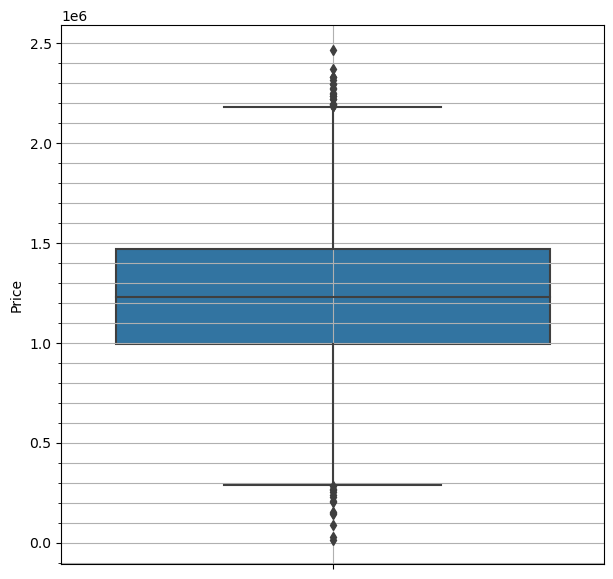

In [4]:
plt.figure(figsize = (7,7))
sns.boxplot(y = df["Price"])
plt.grid()
plt.grid(which = "minor")
plt.minorticks_on()
plt.show()

In [5]:
outlier_df = df[(df["Price"] >= 2150000) | (df["Price"] <= 300000)]
outlier_index = outlier_df.axes

outlier_row_index = outlier_index[0]
outlier_row_index

Int64Index([  90,  126,  256,  263,  355,  437,  465,  622,  693,  696,  715,
             901,  924,  990, 1141, 1195, 1208, 1248, 1271, 1356, 1459, 1485,
            1516, 1536, 1578, 1661, 1799, 2017, 2300, 2538, 2719, 2756, 2795,
            3064, 3091, 3212, 3502, 3922, 4129, 4375, 4400, 4451, 4855],
           dtype='int64')

In [6]:
df.drop(index = outlier_row_index, inplace = True)

# Seperation of X and Y

In [7]:
x = df.iloc[:,:-1]
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [8]:
y = df.iloc[:,-1]
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4957, dtype: float64

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
ac = r2_score(ytest, ypred)
train = lr.score(xtrain,ytrain)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
print(f"Accuracy: {round(ac*100,2)}%")
print(f"Training Accuracy: {round(train*100,2)}%")
print(f"Root Mean Sqaured Error {rmse}")

Accuracy: 91.03%
Training Accuracy: 91.36%
Root Mean Sqaured Error 99606.43995038618


In [12]:
train = lr.score(xtrain, ytrain)
test = lr.score(xtest, ytest)
print(f"Training Accuracy is {train}")
print(f"Testing Accuracy is {test}")

Training Accuracy is 0.9136183988613745
Testing Accuracy is 0.9102645740610846


In [13]:
print(xtest[:10])

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
1579       56086.57393             7.119265                   7.836759   
845        77265.74830             5.387079                   7.600016   
2401       77208.64023             4.804914                   6.951255   
2603       61667.72080             5.593385                   7.333572   
1275       69253.90435             6.187823                   8.513971   
2202       77911.35703             5.615810                   5.058697   
1785       56827.21709             5.695538                   6.249294   
4242       58521.89628             4.750536                   6.854175   
810        74864.37031             6.337005                   8.035623   
3106       75080.17356             5.969801                   7.215912   

      Avg. Area Number of Bedrooms  Area Population  
1579                          3.02      33454.08428  
845                           3.46      21558.37575  
2401                   

In [14]:
print(ypred[:10])

[1211378.32716542 1171313.23585982 1099661.5635692  1505119.92931249
 1256599.99305243 1238708.19313906  742121.93272811  922103.99288216
 1711175.14391896 1617873.58899879]


In [15]:
df["Price"][845]

1097701.943

In [16]:
df.loc[845:845,:]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
845,77265.7483,5.387079,7.600016,3.46,21558.37575,1097701.943


# Making Predictive System

In [17]:
input_data = [77265.7483,5.387079,7.600016,3.46,21558.37575]  

array_input = np.array(input_data)

reshaped_input = array_input.reshape(1,-1)

prediction = lr.predict(reshaped_input)

print(prediction)

[1171313.30317378]


In [18]:
#pip install pickle

In [24]:
import pickle

#filename = 'trained_model.sav'
#pickle.dump((sd,lr), open('model_scaler.sav', 'wb'))
#pickle.dump(lr, open('trained_model.sav', 'wb'))
#(sd, lr) = pickle.load(open('model_scaler.sav','rb'))

loaded_model = pickle.load(open('trained_model.sav','rb'))

input_data = [77265.7483,5.387079,7.600016,3.46,21558.37575]

array_input = np.array(input_data)

reshaped_input = array_input.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input)

print(prediction)


[1171313.30317378]
